In [497]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (classification_report, confusion_matrix, accuracy_score,
                           roc_auc_score, ConfusionMatrixDisplay, RocCurveDisplay)
sns.set()

In [498]:
df = pd.read_csv('zad1/DS/weather.csv')

#drop  unnecessary columns
df.drop('Date', axis='columns', inplace=True)
df.drop('Location', axis='columns', inplace=True)
df.drop('WindGustDir', axis='columns', inplace=True)
df.drop('WindDir9am', axis='columns', inplace=True)
df.drop('WindDir3pm', axis='columns', inplace=True)
df.drop('RainToday', axis='columns', inplace=True)
df.drop('RISK_MM', axis='columns', inplace=True)
df


,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainTomorrow
0,8.0,24.3,0.0,3.4,6.3,30.0,6.0,20,68,29,1019.7,1015.0,7,7,14.4,23.6,Yes
1,14.0,26.9,3.6,4.4,9.7,39.0,4.0,17,80,36,1012.4,1008.4,5,3,17.5,25.7,Yes
2,13.7,23.4,3.6,5.8,3.3,85.0,6.0,6,82,69,1009.5,1007.2,8,7,15.4,20.2,Yes
3,13.3,15.5,39.8,7.2,9.1,54.0,30.0,24,62,56,1005.5,1007.0,2,7,13.5,14.1,Yes
4,7.6,16.1,2.8,5.6,10.6,50.0,20.0,28,68,49,1018.3,1018.5,7,7,11.1,15.4,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,9.0,30.7,0.0,7.6,12.1,76.0,7.0,50,38,15,1016.1,1010.8,1,3,20.4,30.0,No
362,7.1,28.4,0.0,11.6,12.7,48.0,2.0,19,45,22,1020.0,1016.9,0,1,17.2,28.2,No
363,12.5,19.9,0.0,8.4,5.3,43.0,11.0,9,63,47,1024.0,1022.8,3,2,14.5,18.3,No
364,12.5,26.9,0.0,5.0,7.1,46.0,6.0,28,69,39,1021.0,1016.2,6,7,15.8,25.9,No


In [499]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MinTemp        366 non-null    float64
 1   MaxTemp        366 non-null    float64
 2   Rainfall       366 non-null    float64
 3   Evaporation    366 non-null    float64
 4   Sunshine       363 non-null    float64
 5   WindGustSpeed  364 non-null    float64
 6   WindSpeed9am   359 non-null    float64
 7   WindSpeed3pm   366 non-null    int64  
 8   Humidity9am    366 non-null    int64  
 9   Humidity3pm    366 non-null    int64  
 10  Pressure9am    366 non-null    float64
 11  Pressure3pm    366 non-null    float64
 12  Cloud9am       366 non-null    int64  
 13  Cloud3pm       366 non-null    int64  
 14  Temp9am        366 non-null    float64
 15  Temp3pm        366 non-null    float64
 16  RainTomorrow   366 non-null    object 
dtypes: float64(11), int64(5), object(1)
memory usage: 48.7

In [500]:
# split to features and target
y = df['RainTomorrow']
X = df.drop(columns='RainTomorrow')

([<matplotlib.axis.XTick at 0x12a933f50>,
 [Text(0, 0, 'no'), Text(1, 0, 'yes')])

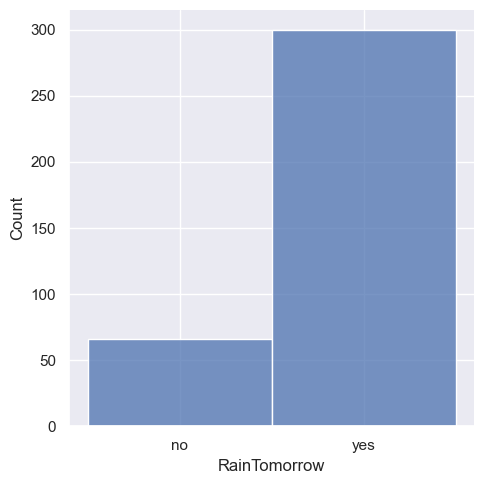

In [501]:
#target distribution
sns.displot(df, x="RainTomorrow", discrete=True)
plt.xticks([0, 1], ['no', 'yes'])

In [502]:
#missing values
imputer = SimpleImputer(strategy='median')
X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)


In [503]:
#normalizacja danych
scaler = StandardScaler()
X_std = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X_std

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
0,0.122047,0.561221,-0.338485,-0.420844,-0.466367,-0.756253,-0.457402,0.227664,-0.307606,-0.922225,-0.001350,-0.280220,1.053250,1.117473,0.363059,0.658867
1,1.119129,0.950363,0.514591,-0.045713,0.515441,-0.064281,-0.711437,-0.111515,0.607091,-0.506250,-1.094644,-1.301800,0.375764,-0.384805,0.914353,0.975549
2,1.069275,0.426518,0.514591,0.479471,-1.332667,3.472460,-0.457402,-1.355171,0.759540,1.454778,-1.528966,-1.487542,1.391994,1.117473,0.540896,0.146145
3,1.002802,-0.755874,9.092744,1.004655,0.342181,1.089004,2.591020,0.679902,-0.764955,0.682252,-2.128031,-1.518499,-0.640465,1.117473,0.203006,-0.773740
4,0.055575,-0.666072,0.325018,0.404445,0.775331,0.781461,1.320844,1.132141,-0.307606,0.266276,-0.211023,0.261527,1.053250,1.117473,-0.223802,-0.577699
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,0.288227,1.519109,-0.338485,1.154707,1.208482,2.780489,-0.330385,3.619453,-2.594349,-1.754176,-0.540509,-0.930316,-0.979208,-0.384805,1.430080,1.623992
362,-0.027515,1.174868,-0.338485,2.655233,1.381742,0.627690,-0.965473,0.114604,-2.060776,-1.338201,0.043580,0.013871,-1.317951,-1.135944,0.861002,1.352551
363,0.869858,-0.097326,-0.338485,1.454812,-0.755133,0.243261,0.177686,-1.015992,-0.688730,0.147426,0.642645,0.927102,-0.301722,-0.760374,0.380843,-0.140377
364,0.869858,0.950363,-0.338485,0.179366,-0.235353,0.473918,-0.457402,1.132141,-0.231382,-0.327974,0.193346,-0.094478,0.714507,1.117473,0.612031,1.005709


In [504]:
X_std.shape

(366, 16)

In [505]:
y.shape

(366,)

In [506]:
X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.25, 
                                                    stratify=y, random_state=42)

In [507]:
#train model
lr = LogisticRegression(penalty=None, random_state=42)
lr.fit(X_train, y_train)


LogisticRegression(penalty=None, random_state=42)

In [508]:
# predictions
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

In [509]:
#performance
print("\nTrain Performance:")
print(classification_report(y_train, y_train_pred))
print("\nTest Performance:")
print(classification_report(y_test, y_test_pred))



Train Performance:
              precision    recall  f1-score   support

          No       0.92      0.96      0.94       225
         Yes       0.76      0.59      0.67        49

    accuracy                           0.89       274
   macro avg       0.84      0.78      0.80       274
weighted avg       0.89      0.89      0.89       274


Test Performance:
              precision    recall  f1-score   support

          No       0.95      0.92      0.93        75
         Yes       0.68      0.76      0.72        17

    accuracy                           0.89        92
   macro avg       0.81      0.84      0.83        92
weighted avg       0.90      0.89      0.89        92



Text(0.5, 1.0, 'Confusion Matrix (Test Set)')

<Figure size 640x480 with 0 Axes>

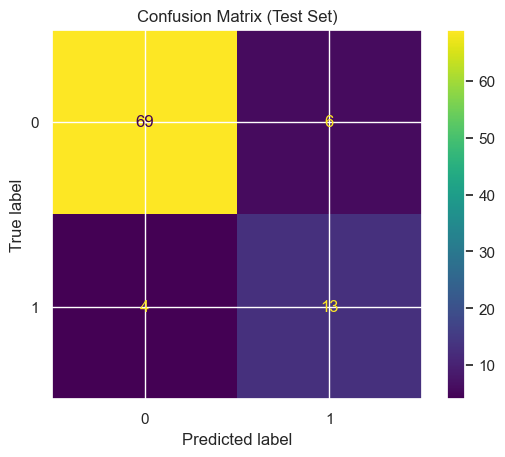

In [510]:
#confusion matrix
plt.figure()
cm_test = confusion_matrix(y_test, y_test_pred)
ConfusionMatrixDisplay(confusion_matrix=cm_test).plot()
plt.title('Confusion Matrix (Test Set)')

<Figure size 640x480 with 0 Axes>

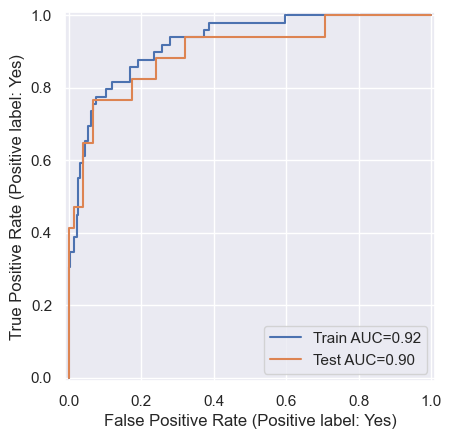

In [511]:
# plot ROC curves
plt.figure()
lab_train = f"Train AUC={roc_auc_score(y_train, lr.predict_proba(X_train)[:, 1]):.2f}"
lab_test = f"Test AUC={roc_auc_score(y_test, lr.predict_proba(X_test)[:, 1]):.2f}"

RocCurveDisplay.from_estimator(lr, X_train, y_train, label=lab_train)
RocCurveDisplay.from_estimator(lr, X_test, y_test, label=lab_test, ax=plt.gca())
plt.legend(loc='lower right')

In [512]:
from sklearn.linear_model import Perceptron

# simple Perceptron, just to see difference
perceptron = Perceptron(random_state=42)
perceptron.fit(X_train, y_train)
y_pred_perceptron = perceptron.predict(X_test)


In [513]:
print("Perceptron accuracy:", accuracy_score(y_test, y_pred_perceptron))


Perceptron accuracy: 0.7934782608695652


In [514]:
print("\nPerceptron (MLP) Results:")
print("-" * 50)



Perceptron (MLP) Results:
--------------------------------------------------


In [515]:
from sklearn.neural_network import MLPClassifier

# MLP with 1 layer and 5 neurons
mlp = MLPClassifier(hidden_layer_sizes=(5,), activation='relu', 
                    solver='adam', random_state=42, max_iter=1000)
mlp.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(5,), max_iter=1000, random_state=42)

In [516]:
# predictions
y_train_pred_mlp = mlp.predict(X_train)
y_test_pred_mlp = mlp.predict(X_test)

In [517]:
# performance
print("\nTrain Performance:")
print(classification_report(y_train, y_train_pred_mlp))
print("\nTest Performance:")
print(classification_report(y_test, y_test_pred_mlp))



Train Performance:
              precision    recall  f1-score   support

          No       0.92      0.97      0.95       225
         Yes       0.84      0.63      0.72        49

    accuracy                           0.91       274
   macro avg       0.88      0.80      0.83       274
weighted avg       0.91      0.91      0.91       274


Test Performance:
              precision    recall  f1-score   support

          No       0.93      0.84      0.88        75
         Yes       0.50      0.71      0.59        17

    accuracy                           0.82        92
   macro avg       0.71      0.77      0.73        92
weighted avg       0.85      0.82      0.83        92



Text(0.5, 1.0, 'Confusion Matrix - Perceptron (Test Set)')

<Figure size 640x480 with 0 Axes>

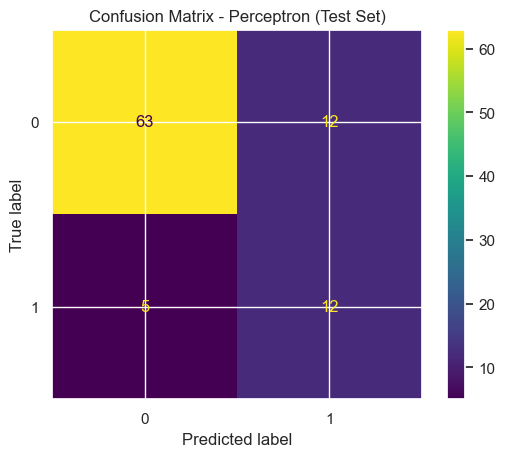

In [518]:
# confusion matrix
plt.figure()
cm_test_mlp = confusion_matrix(y_test, y_test_pred_mlp)
ConfusionMatrixDisplay(confusion_matrix=cm_test_mlp).plot()
plt.title('Confusion Matrix - Perceptron (Test Set)')

<Figure size 640x480 with 0 Axes>

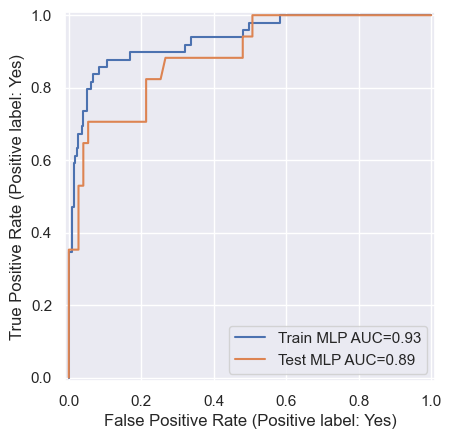

In [519]:
# plot ROC curves
plt.figure()
lab_train_mlp = f"Train MLP AUC={roc_auc_score(y_train, mlp.predict_proba(X_train)[:, 1]):.2f}"
lab_test_mlp = f"Test MLP AUC={roc_auc_score(y_test, mlp.predict_proba(X_test)[:, 1]):.2f}"

RocCurveDisplay.from_estimator(mlp, X_train, y_train, label=lab_train_mlp)
RocCurveDisplay.from_estimator(mlp, X_test, y_test, label=lab_test_mlp, ax=plt.gca())
plt.legend(loc='lower right')

plt.show()